In [1]:
# The magic happens here
import formula as f

## Printing formulas for visual checking

In [2]:
from sympy import init_printing
init_printing()

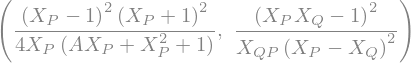

In [3]:
dbladd = f.xDBLADD().formula()
dbladd['X2']/dbladd['Z2'], dbladd['X+']/dbladd['Z+']

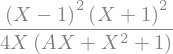

In [4]:
dbl = f.xDBL().formula()
dbl['X'] / dbl['Z']

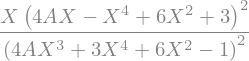

In [5]:
tpl = f.xTPL().formula()
tpl['X'] / tpl['Z']

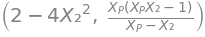

In [6]:
iso2 = f.xIso2().formula()
f.expand(4 * iso2['A₂₄⁺'] / iso2['C₂₄'] - 2), iso2['X'] / iso2['Z']

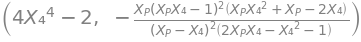

In [7]:
iso4 = f.xIso4().formula()
f.expand(4 * iso4['A₂₄⁺'] / iso4['C₂₄'] - 2), iso4['X'] / iso4['Z']

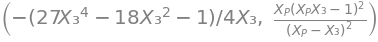

In [8]:
iso3 = f.xIso3().formula()
f.factor(2 * (iso3['A₂₄⁺'] + iso3['A₂₄⁻']) / (iso3['A₂₄⁺'] - iso3['A₂₄⁻'])), iso3['X'] / iso3['Z']

## Looking for zeros

In [9]:
print(f.xDBLADD().pprint())

/**********  Combined Doubling and Differential Addition  **********/
proc xDBLADD(X_P, Z_P, X_Q, Z_Q, X_QP, Z_QP, A₂₄⁺):
t0:     X_P + Z_P
        X_P + Z_P
          {X_P: -Z_P}

t1:     X_P - Z_P
        X_P - Z_P
          {X_P: Z_P}

t2:     t0^2
        (X_P + Z_P)**2
          {X_P: -Z_P}

t3:     X_Q - Z_Q
        X_Q - Z_Q
          {X_Q: Z_Q}

t4:     X_Q + Z_Q
        X_Q + Z_Q
          {X_Q: -Z_Q}

t5:     t0 * t3
        (X_P + Z_P)*(X_Q - Z_Q)
          {X_P: -Z_P}
          {X_Q: Z_Q}

t6:     t1^2
        (X_P - Z_P)**2
          {X_P: Z_P}

t7:     t1 * t4
        (X_P - Z_P)*(X_Q + Z_Q)
          {X_P: Z_P}
          {X_Q: -Z_Q}

t8:     t2 - t6
        4*X_P*Z_P
          {X_P: 0}
          {Z_P: 0}

X2>     t2 * t6
        (X_P - Z_P)**2*(X_P + Z_P)**2
          {X_P: -Z_P}
          {X_P: Z_P}

t10:    A₂₄⁺ * t8
        4*A₂₄⁺*X_P*Z_P
          {A₂₄⁺: 0}
          {X_P: 0}
          {Z_P: 0}

t11:    t5 - t7
        -2*(X_P*Z_Q - X_Q*Z_P)
          {X_P: X_Q*Z_P/Z

In [10]:
f.factor(f.xDBLADD()[12].exp)  # 2-torsion points

In [11]:
print(f.xDBL().pprint())

/**********  Point Doubling  **********/
proc xDBL(X, Z, A₂₄⁺, C₂₄):
t0:     X - Z
        X - Z
          {X: Z}

t1:     X + Z
        X + Z
          {X: -Z}

t2:     t0^2
        (X - Z)**2
          {X: Z}

t3:     t1^2
        (X + Z)**2
          {X: -Z}

t4:     C₂₄ * t2
        C₂₄*(X - Z)**2
          {C₂₄: 0}
          {X: Z}

X>      t4 * t3
        C₂₄*(X - Z)**2*(X + Z)**2
          {C₂₄: 0}
          {X: -Z}
          {X: Z}

t6:     t3 - t2
        4*X*Z
          {X: 0}
          {Z: 0}

t7:     A₂₄⁺ * t6
        4*A₂₄⁺*X*Z
          {A₂₄⁺: 0}
          {X: 0}
          {Z: 0}

t8:     t4 + t7
        4*A₂₄⁺*X*Z + C₂₄*X**2 - 2*C₂₄*X*Z + C₂₄*Z**2
          {A₂₄⁺: C₂₄*(X - Z)**2/((X - Z)**2 - (X + Z)**2)}

Z>      t8 * t6
        4*X*Z*(4*A₂₄⁺*X*Z + C₂₄*X**2 - 2*C₂₄*X*Z + C₂₄*Z**2)
          {A₂₄⁺: C₂₄*(X - Z)**2/((X - Z)**2 - (X + Z)**2)}
          {X: 0}
          {Z: 0}


In [12]:
print(f.xTPL().pprint())

/**********  Point Tripling  **********/
proc xTPL(X, Z, A₂₄⁺, A₂₄⁻):
t0:     X - Z
        X - Z
          {X: Z}

t1:     X + Z
        X + Z
          {X: -Z}

t2:     t0^2
        (X - Z)**2
          {X: Z}

t3:     t1^2
        (X + Z)**2
          {X: -Z}

t4:     t1 + t0
        2*X
          0

t5:     t1 - t0
        2*Z
          0

t6:     t4^2
        4*X**2
          0

t7:     t6 - t3
        (X - Z)*(3*X + Z)
          {X: -Z/3}
          {X: Z}

t8:     t7 - t2
        2*(X - Z)*(X + Z)
          {X: -Z}
          {X: Z}

t9:     t3 * A₂₄⁺
        A₂₄⁺*(X + Z)**2
          {A₂₄⁺: 0}
          {X: -Z}

t10:    t9 * t3
        A₂₄⁺*(X + Z)**4
          {A₂₄⁺: 0}
          {X: -Z}

t11:    t2 * A₂₄⁻
        A₂₄⁻*(X - Z)**2
          {A₂₄⁻: 0}
          {X: Z}

t12:    t2 * t11
        A₂₄⁻*(X - Z)**4
          {A₂₄⁻: 0}
          {X: Z}

t13:    t12 - t10
        -A₂₄⁺*X**4 - 4*A₂₄⁺*X**3*Z - 6*A₂₄⁺*X**2*Z**2 - 4*A₂₄⁺*X*Z**3 - A₂₄⁺*Z**4 + A₂₄⁻*X**4 - 4*A₂₄⁻*X**3*Z + 6*A₂₄⁻

Potentially dangerous intermediate values. If $(X:Z)$ has order $3$, then $A = -2$, but for higher orders it's unclear what happens.

In [13]:
f.factor(f.xTPL()[7].exp)

$t_{13}$ and $t_{16}$ are interesting. If we assume that $(X:Z)$ has order $3^n$, the only zeros seem to be $A=±2$ (with high multiplicity), as the Sage experiment below shows:

```
sage: R.<A,X> = PolynomialRing(QQ, order='invlex')
sage: R.ideal(2*A*X*(X^2+1) + X^4 + 6*X^2 + 1,
              EllipticCurve([0,A,0,1,0]).division_polynomial(27, X)).groebner_basis()[-1].factor()
(A - 2)^69 * (A + 2)^69
sage: R.ideal(4*A*X - X^4 + 6*X^2 + 3,
              EllipticCurve([0,A,0,1,0]).division_polynomial(27, X)).groebner_basis()[-1].factor()
(A - 2)^81 * (A + 2)^81
```

In [14]:
f.xTPL()[13].exp

In [15]:
A = f.Symbol('A')
f.factor(f.xTPL()[13].exp.subs({'A₂₄⁺':(A+2), 'A₂₄⁻':(A-2), 'Z':1}))

In [16]:
f.factor(f.xTPL()[16].exp.subs({'A₂₄⁺':(A+2), 'A₂₄⁻':(A-2), 'Z':1}))

This is just the 3-division polynomial, nothing to see here

In [17]:
f.factor(f.xTPL()[19].exp.subs({'A₂₄⁺':(A+2), 'A₂₄⁻':(A-2), 'Z':1}))  # 3-division polynomial

In [18]:
print(f.xIso2().pprint())

/**********  Degree 2 isogeny computation and evaluation  **********/
proc xIso2(X₂, Z₂, X_P, Z_P):
t0:     X₂^2
        X₂**2
          0

C₂₄>    Z₂^2
        Z₂**2
          0

A₂₄⁺>   C₂₄ - t0
        -(X₂ - Z₂)*(X₂ + Z₂)
          {X₂: -Z₂}
          {X₂: Z₂}

t1:     X₂ + Z₂
        X₂ + Z₂
          {X₂: -Z₂}

t2:     X₂ - Z₂
        X₂ - Z₂
          {X₂: Z₂}

t3:     X_P + Z_P
        X_P + Z_P
          {X_P: -Z_P}

t4:     X_P - Z_P
        X_P - Z_P
          {X_P: Z_P}

t5:     t1 * t4
        (X_P - Z_P)*(X₂ + Z₂)
          {X_P: Z_P}
          {X₂: -Z₂}

t6:     t2 * t3
        (X_P + Z_P)*(X₂ - Z₂)
          {X_P: -Z_P}
          {X₂: Z₂}

t7:     t5 + t6
        2*(X_P*X₂ - Z_P*Z₂)
          {X_P: Z_P*Z₂/X₂}

t8:     t5 - t6
        2*(X_P*Z₂ - X₂*Z_P)
          {X_P: X₂*Z_P/Z₂}

X>      X_P * t7
        2*X_P*(X_P*X₂ - Z_P*Z₂)
          {X_P: 0}
          {X₂: Z_P*Z₂/X_P}

Z>      Z_P * t8
        2*Z_P*(X_P*Z₂ - X₂*Z_P)
          {X_P: X₂*Z_P/Z₂}
          {Z_P: 0}


In [19]:
print(f.xIso4().pprint())

/**********  Degree 4 isogeny computation and evaluation  **********/
proc xIso4(X₄, Z₄, X_P, Z_P):
K₂>     X₄ - Z₄
        X₄ - Z₄
          {X₄: Z₄}

K₃>     X₄ + Z₄
        X₄ + Z₄
          {X₄: -Z₄}

t0:     Z₄^2
        Z₄**2
          0

t1:     t0 + t0
        2*Z₄**2
          0

C₂₄>    t1^2
        4*Z₄**4
          0

K₁>     t1 + t1
        4*Z₄**2
          0

t2:     X₄^2
        X₄**2
          0

t3:     t2 + t2
        2*X₄**2
          0

A₂₄⁺>   t3^2
        4*X₄**4
          0

t4:     X_P + Z_P
        X_P + Z_P
          {X_P: -Z_P}

t5:     X_P - Z_P
        X_P - Z_P
          {X_P: Z_P}

t6:     t4 * K₂
        (X_P + Z_P)*(X₄ - Z₄)
          {X_P: -Z_P}
          {X₄: Z₄}

t7:     t5 * K₃
        (X_P - Z_P)*(X₄ + Z₄)
          {X_P: Z_P}
          {X₄: -Z₄}

t8:     t4 * t5
        (X_P - Z_P)*(X_P + Z_P)
          {X_P: -Z_P}
          {X_P: Z_P}

t9:     t8 * K₁
        4*Z₄**2*(X_P - Z_P)*(X_P + Z_P)
          {X_P: -Z_P}
          {X_P: Z_P}
          {Z

These values seem to be related to the kernel and its coset by $T=(0:1)$, so probably no big deal

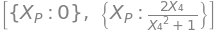

In [20]:
f.solve(f.xIso4()[14].exp.subs({'Z₄':1, 'Z_P':1}))

In [21]:
f.solve(f.xIso4()[15].exp.subs({'Z₄':1, 'Z_P':1}))

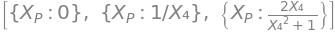

In [22]:
f.solve(f.xIso4()['X'].exp.subs({'Z₄':1, 'Z_P':1}))

In [23]:
f.solve(f.xIso4()['Z'].exp.subs({'Z₄':1, 'Z_P':1}))

In [24]:
print(f.xIso3().pprint())

/**********  Degree 3 isogeny computation and evaluation  **********/
proc xIso3(X₃, Z₃, X_P, Z_P):
K₁>     X₃ - Z₃
        X₃ - Z₃
          {X₃: Z₃}

t0:     K₁^2
        (X₃ - Z₃)**2
          {X₃: Z₃}

K₂>     X₃ + Z₃
        X₃ + Z₃
          {X₃: -Z₃}

t1:     K₂^2
        (X₃ + Z₃)**2
          {X₃: -Z₃}

t2:     t0 + t1
        2*(X₃**2 + Z₃**2)
          {X₃: -I*Z₃}
          {X₃: I*Z₃}

t3:     K₁ + K₂
        2*X₃
          0

t4:     t3^2
        4*X₃**2
          0

t5:     t4 - t2
        2*(X₃ - Z₃)*(X₃ + Z₃)
          {X₃: -Z₃}
          {X₃: Z₃}

t6:     t1 + t5
        (X₃ + Z₃)*(3*X₃ - Z₃)
          {X₃: -Z₃}
          {X₃: Z₃/3}

t7:     t5 + t0
        (X₃ - Z₃)*(3*X₃ + Z₃)
          {X₃: -Z₃/3}
          {X₃: Z₃}

t8:     t7 + t0
        4*X₃*(X₃ - Z₃)
          {X₃: 0}
          {Z₃: X₃}

t9:     t8 + t8
        8*X₃*(X₃ - Z₃)
          {X₃: 0}
          {Z₃: X₃}

t10:    t1 + t9
        (3*X₃ - Z₃)**2
          {X₃: Z₃/3}

A₂₄⁻>   t6 * t10
        (X₃ + Z₃)*(3*X

Interesting, $(±i:1)$ might be a problem. These are points of order $3$ when $A=±i$ (not a CM curve, not supersingular for p434). Seems messy for higher orders.

In [25]:
f.factor(f.xIso3()[2].exp)

$±1/3$, again!

In [26]:
f.factor(f.xIso3()[6].exp)

In [27]:
f.factor(f.xIso3()[7].exp)

Careful about translation by $T=(0:1)$. Not a big deal, but a bit surprised to see this here.

In [28]:
f.factor(f.xIso3()[18].exp)